# **Flight Delay Analysis: Exploratory Data Insights**


## Introduction

This notebook presents an exploratory data analysis (EDA) of flight delays using a dataset that contains detailed information about various flight characteristics, including departure and arrival times, airline names, flight distances, and more. The goal of this analysis is to uncover patterns and trends related to flight delays, identifying which factors most influence delays and when they tend to occur.

### Key Areas of Analysis:

1. **Overall Delay Distribution**: We begin by exploring the overall distribution of arrival delays to understand the general behavior of flight delays across the dataset.
2. **Delays by Airline**: We analyze how different airlines perform in terms of average delay times, helping to identify potential inefficiencies in operations.
3. **Delays by Origin and Destination Airports**: Delays are also examined by airport, allowing us to see which airports are most likely to experience or contribute to delayed flights.
4. **Correlation Between Variables**: Using correlation analysis, we explore whether flight characteristics like distance, flight time, and scheduled arrival time have any significant relationship with delays.
5. **Time-Series Analysis of Delays**: Finally, we look at how delays fluctuate based on the time of day and day of the week to identify peak times for delays.

Throughout the analysis, various visualizations are provided to give a clear picture of the trends and relationships in the data. The findings can provide valuable insights for improving flight scheduling, operational efficiency, and passenger experience by targeting specific areas prone to delays.


In [117]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn theme for better plots
sns.set_theme()

# Dictionary of file paths
csv_files = {
    "flight_states.csv": "../data/flight_states.csv",
    "test_arrivals.csv": "../data/test_arrivals.csv",
    "arrivals.csv": "../data/arrivals.csv",
    "flights_by_aircraft.csv": "../data/flights_by_aircraft.csv",
    "departures.csv": "../data/departures.csv",
    "flights.csv": "../data/flights.csv",
    "test_flight_states.csv": "../data/test_flight_states.csv",
}

# Dictionary to store DataFrames
dataframes = {}

# Load each CSV file
for file_name, file_path in csv_files.items():
    try:
        dataframes[file_name] = pd.read_csv(file_path)
        print(f"Loaded {file_name} successfully.")
    except FileNotFoundError:
        print(f"File not found: {file_name}")

Loaded flight_states.csv successfully.
Loaded test_arrivals.csv successfully.
Loaded arrivals.csv successfully.
Loaded flights_by_aircraft.csv successfully.
Loaded departures.csv successfully.
Loaded flights.csv successfully.
Loaded test_flight_states.csv successfully.


In [118]:
# Example: Access the 'flights.csv' DataFrame
flights_df = dataframes["flights.csv"]

## **Exploratory Data Analysis**


## Arrival Delay Distribution


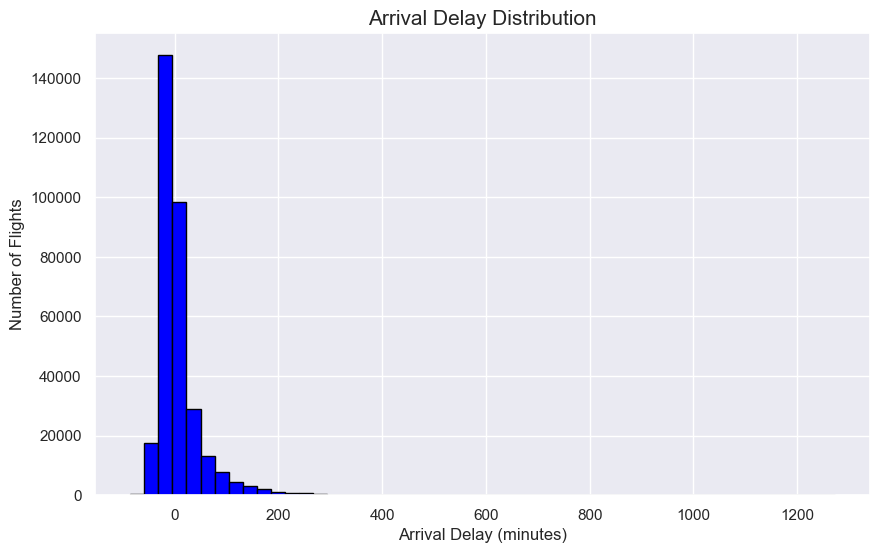

In [119]:
# Plot a histogram for the arrival delay distribution
plt.figure(figsize=(10, 6))
plt.hist(flights_df["arr_delay"].dropna(), bins=50, color="blue", edgecolor="black")
plt.title("Arrival Delay Distribution", fontsize=15)
plt.xlabel("Arrival Delay (minutes)", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

### Analysis:

- Skewed Distribution: The arrival delay distribution is heavily right-skewed, meaning that most flights either arrive on time or experience only minor delays. A small number of flights have much larger delays.
- Concentration Around Zero: The majority of flights seem to have very low delay times (between 0 and 50 minutes). This suggests that most flights generally run close to their scheduled times.
- Long Delays: The histogram shows that there are instances of very long delays, extending beyond 200 minutes (over 3 hours), but these cases are rare.

### Insights:

- Operational Efficiency: The low concentration of large delays suggests that, overall, flights are relatively punctual. However, the presence of significant outliers (delays of over 200 minutes) could be worth further investigation. For instance, it would be useful to determine whether these delays are caused by specific factors like airline, airport, or time of day.
- Potential Issues: Although long delays are rare, when they do occur, they could cause significant disruption. Understanding the cause of these large delays could help mitigate them.

### Next Steps:

- Investigate which factors (airlines, airports, times of day) contribute to long delays.
- Examine how external factors (e.g., weather) might impact these delay outliers.


## Delays by airline


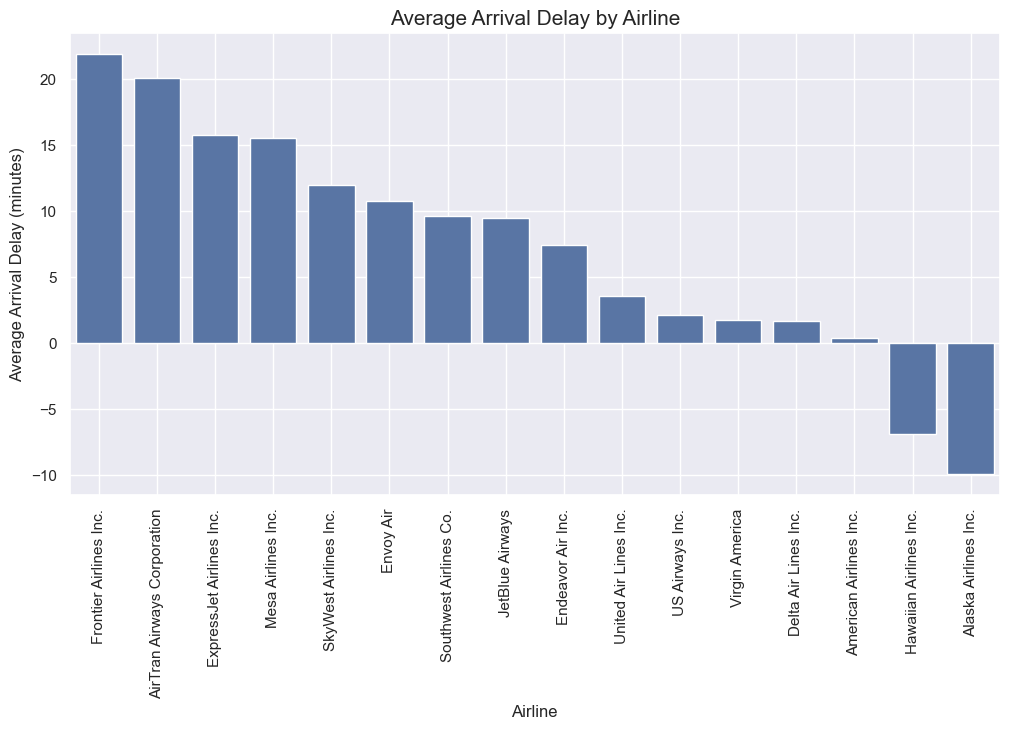

In [121]:
# Group the data by airline and calculate the average arrival delay
airline_delay = (
    flights_df.groupby("name")["arr_delay"].mean().sort_values(ascending=False)
)

# Plot the average delay per airline without using the palette argument
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_delay.index, y=airline_delay.values)
plt.title("Average Arrival Delay by Airline", fontsize=15)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Average Arrival Delay (minutes)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.show()

### Analysis:

- Highest Delays: The airlines with the highest average delays are Frontier Airlines Inc., AirTran Airways Corporation, and ExpressJet Airlines Inc.. These airlines consistently experience delays above 15 minutes on average.
- Moderate Delays: Airlines like SkyWest Airlines Inc. and Envoy Air have moderate average delays (around 10-15 minutes). These delays, while not as severe as the top airlines, still suggest room for improvement in operations or scheduling.
- On-Time or Early Arrivals: Interestingly, Alaska Airlines Inc. and Hawaiian Airlines Inc. have negative average delays, meaning they typically arrive early. This suggests high operational efficiency and good scheduling practices.

### Insights:

- Operational Efficiency Gaps: There is a clear gap in operational efficiency between airlines, with some airlines facing average delays of over 20 minutes while others tend to arrive early. This could be due to factors like differences in fleet management, airport hubs, or external conditions.
- High-Risk Airlines for Delays: Passengers flying with airlines like Frontier and AirTran should expect more frequent delays compared to those flying with Alaska or Hawaiian Airlines, where on-time performance or early arrivals are more common.
- Performance Comparison: Airlines that tend to arrive early (like Alaska and Hawaiian) might be more attractive for passengers prioritizing punctuality, while those with consistent delays may need to address operational or logistical challenges.

### Next Steps:

- Investigate why certain airlines experience more delays than others. Factors such as the routes they operate, airport congestion, or weather conditions at their hubs might contribute to their performance.
- Further analysis could look into specific routes or time periods where delays are more common for these airlines.


## **Origin and Destination Airports**


## Delays by Origin Airport


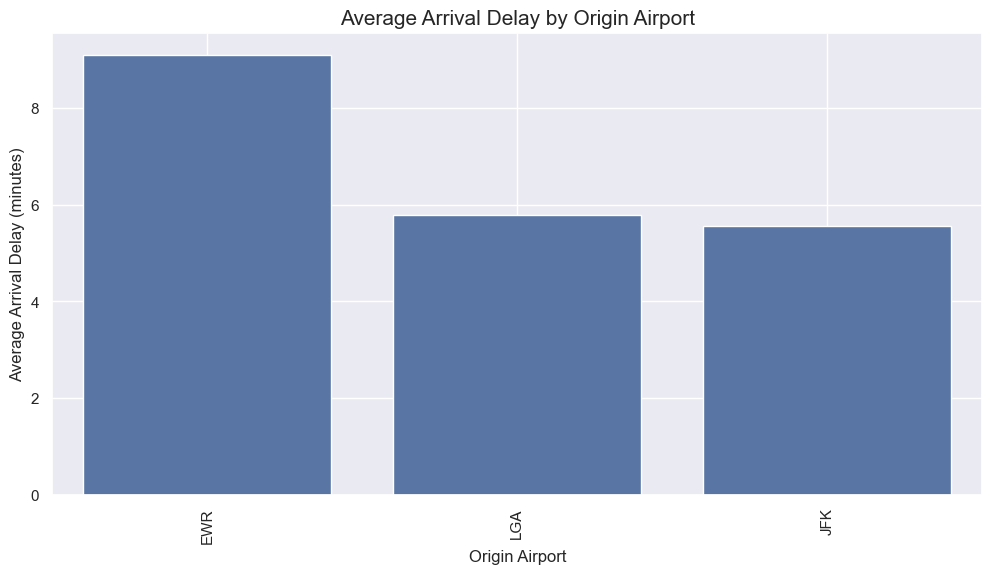

In [122]:
# Group the data by origin airport and calculate the average arrival delay
origin_delay = (
    flights_df.groupby("origin")["arr_delay"].mean().sort_values(ascending=False)
)

# Plot the average delay per origin airport
plt.figure(figsize=(12, 6))
sns.barplot(x=origin_delay.index, y=origin_delay.values)
plt.title("Average Arrival Delay by Origin Airport", fontsize=15)
plt.xlabel("Origin Airport", fontsize=12)
plt.ylabel("Average Arrival Delay (minutes)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.show()

# Key Findings (in markdown format):
# - This chart shows the average arrival delay by origin airport.
# - Airports with the longest average delays can be identified.
# - This helps identify problem airports from where flights tend to be delayed more often.

### Analysis:

- Newark Liberty International Airport (EWR) has the highest average arrival delay, at around 8 minutes. This suggests that flights departing from EWR are more prone to delays compared to other major airports in this dataset.
- LaGuardia Airport (LGA) has a moderate average delay of around 5 minutes.
- John F. Kennedy International Airport (JFK) shows the lowest average delay in this group, at around 4 minutes.

### Insights:

- Newark (EWR) Issues: Newark’s significantly higher average delay could be due to factors such as airport congestion, operational inefficiencies, or its role as a major hub for certain airlines.
- Comparing NYC Airports: Although all three airports (EWR, LGA, JFK) are located in the New York City area, their delay performance differs. Newark stands out with notably higher delays, suggesting that passengers departing from Newark should expect more frequent delays compared to LaGuardia or JFK.
- JFK Performance: JFK’s lower average delay could be attributed to better handling of flight operations, or perhaps fewer capacity issues compared to Newark or LaGuardia.

### Next Steps:

- Further investigate why EWR experiences significantly more delays than LGA and JFK. Factors such as airport traffic volume, weather conditions, or specific airline operations could play a role.
- Analyze if delays at these airports fluctuate during specific times of day or seasons to provide more insights into the causes of delays.


## Delays by Destination Airport


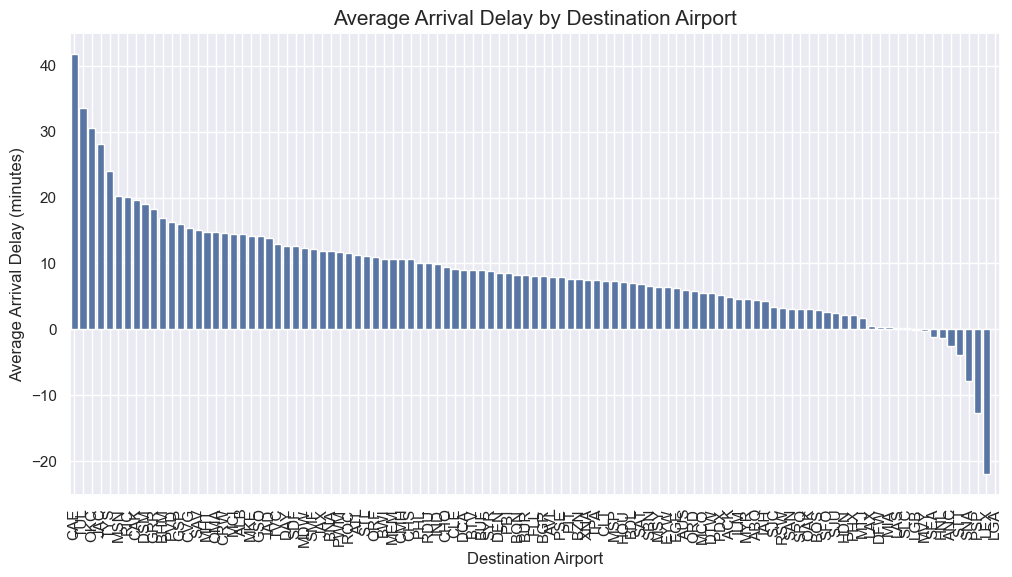

In [123]:
# Group the data by destination airport and calculate the average arrival delay
destination_delay = (
    flights_df.groupby("dest")["arr_delay"].mean().sort_values(ascending=False)
)

# Plot the average delay per destination airport
plt.figure(figsize=(12, 6))
sns.barplot(x=destination_delay.index, y=destination_delay.values)
plt.title("Average Arrival Delay by Destination Airport", fontsize=15)
plt.xlabel("Destination Airport", fontsize=12)
plt.ylabel("Average Arrival Delay (minutes)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.show()

### Analysis:

- Wide Range of Delays: This chart shows a broad spectrum of average delays across various destination airports, ranging from over 40 minutes of delay to some airports having negative average delays (early arrivals).
- High-Delay Airports: The airport with the highest average arrival delay (over 40 minutes) experiences significantly more delays compared to others, followed by several airports where average delays range between 20 and 30 minutes.
- Early Arrivals: Some destination airports show negative average delays, indicating that flights tend to arrive early at these locations. The most prominent early arrival is close to -20 minutes.

### Insights:

- Problematic Airports: A few destination airports are consistently seeing high average delays. These airports may have systemic operational issues, such as congestion or infrastructure constraints, leading to frequent delays.
- On-Time and Early Airports: Airports with negative average delays are likely better at managing flight operations or may have less air traffic congestion, leading to early arrivals. These airports may benefit from underutilized capacity or favorable weather conditions.
  Performance Gaps: The large variance between destination airports highlights that some airports handle air traffic and arrivals much more efficiently than others.

### Next Steps:

- Investigate why certain airports, particularly those with the highest delays, are more prone to arrival delays. Factors like congestion, weather, or specific airline operations could contribute.
- Identify common traits among airports with negative delays to determine best practices that might be applied to airports with higher delays.
- Cross-check if the airports with high delays are common destinations for airlines with high average delays, suggesting operational or logistical challenges specific to certain routes.


## Correlations Between Delays and Other Variables: Distance, Flight Time, and Scheduled Arrival Time


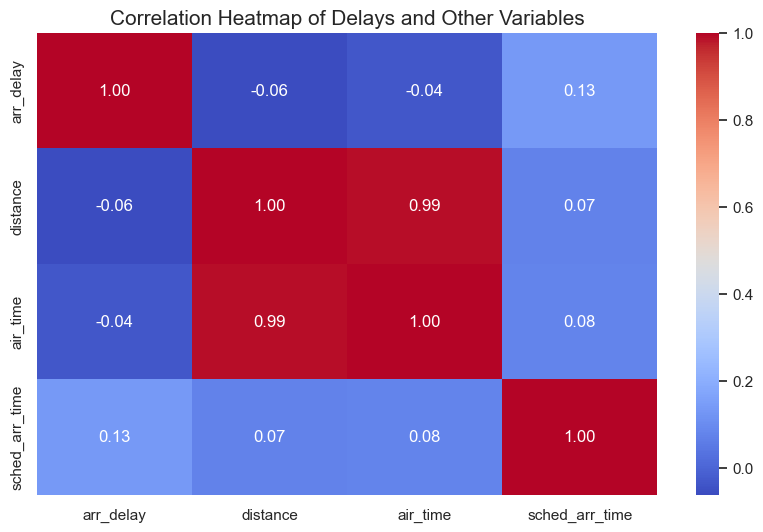

In [124]:
# Select relevant columns for correlation analysis
correlation_df = flights_df[
    ["arr_delay", "distance", "air_time", "sched_arr_time"]
].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Delays and Other Variables", fontsize=15)
plt.show()

### Analysis:

- Weak Correlation with Arrival Delays: The variable arr_delay shows weak correlations with other variables:

**Distance**: A small negative correlation (-0.06) suggests that longer flight distances don’t significantly increase or reduce delays.

**Air Time**: Similarly, a weak correlation (-0.04) indicates that the duration of the flight doesn’t have a strong impact on arrival delays.

**Scheduled Arrival Time**: There is a slightly stronger correlation (0.13) between sched_arr_time and arr_delay, but this is still weak. It suggests that the time of day a flight is scheduled to arrive might have a marginal influence on delays.

- Strong Correlation Between Distance and Air Time: There is a nearly perfect correlation (0.99) between distance and air_time, which is expected as longer distances typically result in longer air time.

### Insights:

- Arrival Delays Aren't Heavily Influenced by Distance or Flight Time: The weak correlations suggest that factors such as flight distance or air time don’t significantly impact whether a flight will be delayed. This indicates that other factors—such as weather, operational delays, or airport congestion—may play a larger role.
- Slight Influence of Scheduled Arrival Time: The slightly positive correlation between scheduled arrival time and delays hints that flights scheduled for certain times of the day (e.g., peak traffic hours) might face more delays. This could be explored further in a time-of-day analysis.
- Distance and Air Time: The high correlation between distance and air time is logical, as these two variables are closely linked.

### Next Steps:

- To better understand what impacts delays, other variables, such as weather data or airport congestion factors, might need to be included in the analysis.
- Time-series analysis could be extended to see if specific times of day, days of the week, or months correlate more strongly with delays, offering more insight into peak periods of congestion or inefficiencies.


## **Time-Series Analysis:**


## Delays by Hour of the Day


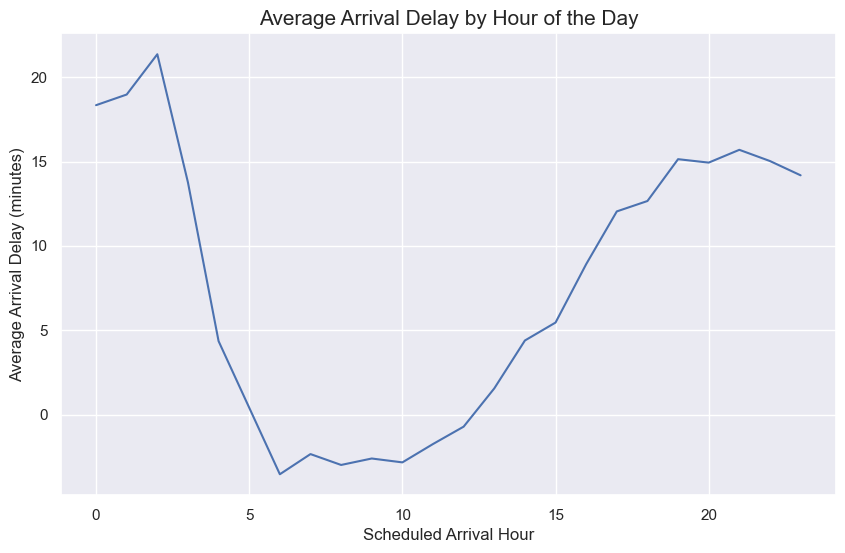

In [125]:
# Extract the hour from the scheduled arrival time
flights_df["sched_arr_hour"] = flights_df["sched_arr_time"] // 100  # Convert to hours

# Group by hour and calculate the average delay
hourly_delay = flights_df.groupby("sched_arr_hour")["arr_delay"].mean().sort_index()

# Plot the average delay by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_delay.index, y=hourly_delay.values)
plt.title("Average Arrival Delay by Hour of the Day", fontsize=15)
plt.xlabel("Scheduled Arrival Hour", fontsize=12)
plt.ylabel("Average Arrival Delay (minutes)", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

### Analysis:

- Peak Delay Hours: Flights scheduled to arrive between midnight and 3 AM experience the highest average delays, with delays peaking at over 20 minutes around 1 AM. This may indicate that late-night and early-morning flights face higher delays due to operational challenges such as reduced staffing, airport closures, or weather conditions.
- Lowest Delay Hours: Between 4 AM and 7 AM, flights tend to experience the lowest average delays, with some arriving close to on time or early. This could be because early morning hours are typically less congested, and there are fewer disruptions to the schedule.
- Gradual Increase: Starting from mid-morning (8 AM), delays begin to increase steadily, reaching another peak in the afternoon around 5 PM to 7 PM, likely due to increased air traffic and congestion at major hubs during peak travel hours.

### Insights:

- Operational Efficiency in the Early Morning: Flights scheduled in the early morning hours (4 AM to 7 AM) generally experience fewer delays, likely because airports and airlines have had time to reset their schedules overnight.
- Late-Night and Afternoon Congestion: The large spike in delays during late-night hours could be the result of cascading delays from earlier in the day, compounded by fewer resources or operational inefficiencies during off-peak hours. The afternoon delays could be driven by peak travel times when air traffic is higher and airports are more congested.
- Potential Action: Airlines and airports could focus on improving operational efficiency during the late-night and afternoon hours to mitigate delays. Further investigation into staffing, resource allocation, and flight scheduling during these hours might help reduce delays.

### Next Steps:

- It could be useful to analyze specific airports or airlines during these peak delay hours to identify potential bottlenecks.
- A seasonal breakdown of these time patterns might provide insights into whether certain times of the year (such as holidays or summer) exacerbate delays at specific hours.


## Delays by Day of the Week


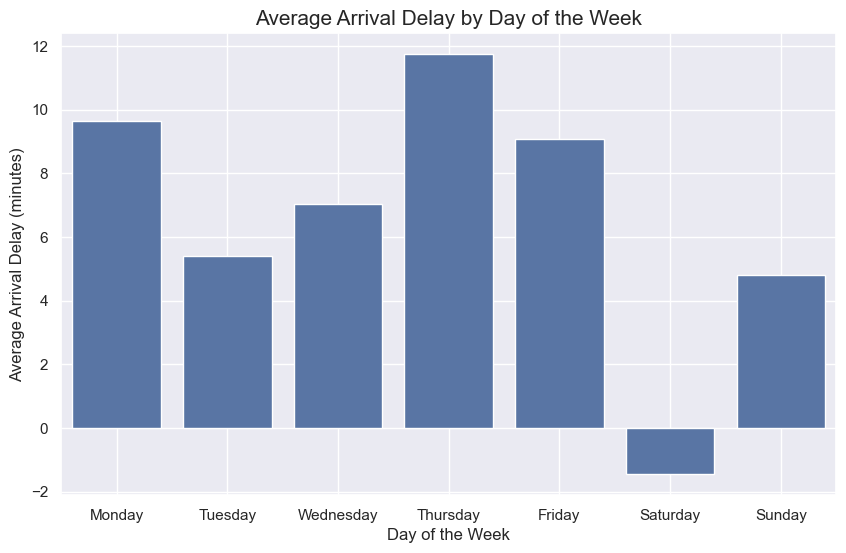

In [126]:
# Create a 'day of week' column from the 'time_hour' column
flights_df["time_hour"] = pd.to_datetime(
    flights_df["time_hour"]
)  # Ensure time_hour is datetime
flights_df["day_of_week"] = flights_df["time_hour"].dt.day_name()

# Group by day of the week and calculate the average delay
weekly_delay = (
    flights_df.groupby("day_of_week")["arr_delay"]
    .mean()
    .reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
)

# Plot the average delay by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_delay.index, y=weekly_delay.values)
plt.title("Average Arrival Delay by Day of the Week", fontsize=15)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Arrival Delay (minutes)", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

### Analysis:

- Highest Delays on Thursdays: Flights scheduled on Thursdays experience the highest average delays, close to 12 minutes. This could be due to higher travel demand mid-week or operational inefficiencies leading up to the weekend.
- Moderate Delays on Mondays and Fridays: Both Mondays and Fridays show moderate delays, around 8-10 minutes, possibly reflecting increased travel activity at the start and end of the workweek.
- Low Delays on Weekends (Especially Saturdays): Saturdays have the lowest average delays, even showing slightly early arrivals on average. This may indicate less congestion or fewer flights overall during the weekend. Sundays show low but positive delays, likely due to less air traffic compared to weekdays.
- Tuesday and Wednesday: These midweek days show lower delays compared to Mondays and Thursdays, suggesting that they may be quieter travel days with fewer operational disruptions.

### Insights:

- Thursday as a High Delay Day: The significant spike in delays on Thursdays may suggest that airlines and airports experience more operational challenges mid-week, or it could reflect increased business and leisure travel demand as the weekend approaches.
- Saturday as an Optimal Travel Day: Saturday stands out as the best day for on-time arrivals, with early arrivals on average. Travelers looking for fewer delays may benefit from flying on Saturdays when airports are less congested.
- Potential Operational Adjustments: Airlines and airports may want to investigate why Thursday has higher delays and consider strategies for improving efficiency on this day, such as better managing air traffic or allocating more resources to avoid delays.

### Next Steps:

- Further analysis could break down this data by specific airports or routes to see if certain airports or flight paths are more prone to Thursday delays.
- Cross-reference this with the time-of-day analysis to see if specific hours on Thursdays (e.g., peak afternoon hours) contribute most to the delays.

---


## **Summary of Findings:**

Throughout the exploratory data analysis of flight delays, several important trends and insights emerged. Here’s a summary of the key findings:

### 1. Overall Delay Distribution:

Right-Skewed Distribution: Most flights experience relatively minor delays (between 0 and 50 minutes). However, there are a small number of flights with significant delays extending beyond 200 minutes.
Operational Efficiency: The majority of flights are close to their scheduled times, but the presence of long delays suggests that certain factors contribute to extreme delays.

### 2. Delays by Airline:

High-Delay Airlines: Airlines such as Frontier Airlines Inc. and AirTran Airways Corporation show average delays exceeding 20 minutes, indicating potential operational inefficiencies.
Low-Delay or Early Airlines: Alaska Airlines Inc. and Hawaiian Airlines Inc. frequently arrive early, showcasing strong operational performance.
Performance Gaps: There is a clear difference in on-time performance between airlines, highlighting opportunities for improvement among the higher-delay carriers.

### 3. Delays by Origin and Destination Airports:

Origin Airport Delays: Newark Liberty International Airport (EWR) has the highest average delays (around 8 minutes), whereas JFK has the lowest delays, indicating better performance.
Destination Airport Delays: Certain destination airports exhibit significantly higher delays (over 40 minutes), while others see early arrivals. These patterns suggest that some airports face recurring operational challenges, while others manage traffic efficiently.

### 4. Correlation Analysis:

Weak Correlation with Delays: Variables such as flight distance and air time have a weak negative correlation with arrival delays, suggesting that factors like flight length do not heavily influence delays.
Slight Influence of Scheduled Arrival Time: There is a slight positive correlation between scheduled arrival time and delays, suggesting that certain times of day may contribute more to delays.

### 5. Time of Day Analysis:

High Delays at Night: Flights scheduled between midnight and 3 AM experience the highest average delays, exceeding 20 minutes.
Early Morning Efficiency: Flights scheduled between 4 AM and 7 AM tend to experience the least delays, likely due to less air traffic and congestion.
Afternoon Congestion: Delays steadily increase after 8 AM, peaking again in the afternoon (around 5-7 PM), likely due to higher traffic during peak hours.

### 6. Day of the Week Analysis:

Thursday is the Most Delayed Day: Flights on Thursdays experience the highest average delays (around 12 minutes), suggesting increased travel demand or operational challenges mid-week.
Saturday is the Best Day for On-Time Flights: Flights on Saturdays often arrive slightly early, indicating less congestion or fewer operational disruptions during the weekend.
Monday and Friday: These days also show moderate delays, likely reflecting increased travel at the start and end of the workweek.

### Key Takeaways:

- Airlines and Airports with Consistent Delays: Certain airlines and airports consistently perform worse than others, suggesting that improvements in resource allocation, scheduling, or operational processes may help reduce delays.
- Peak Delay Times: Delays are more frequent during late-night and afternoon hours, as well as on Thursdays, providing valuable insights for scheduling adjustments or operational improvements.
- Early Arrivals: Airlines and airports that frequently achieve early arrivals may serve as benchmarks for best practices in operational efficiency and flight management.

### Recommendations:

- Investigate High-Delay Airports: Airports with frequent delays (like EWR and certain destination airports) should be analyzed further to understand the root causes (e.g., congestion, weather, staffing).
- Improve Operational Efficiency on Thursdays: Airlines should focus on reducing Thursday delays through improved scheduling or resource allocation.
- Leverage Early Morning Travel: For travelers looking to minimize delays, early morning flights (especially on Saturdays) are optimal.

---


## **Pyhton Tools, Libraries, and Functions Used in the Analysis:**

### 1. Pandas:

Pandas is a powerful library for data manipulation and analysis. In this analysis, it was used to:

- **Load CSV files** into dataframes for easy access and manipulation.
- Perform **grouping, sorting, and filtering** operations to calculate average delays and identify patterns.
- **Create new columns** (e.g., extracting the hour from scheduled arrival times) for further analysis.

Key functions:

- `pd.read_csv()` - Used to load the dataset.
- `groupby()` - To group the data by airlines, airports, and times for calculating average delays.
- `dropna()` - To handle missing values by removing them from specific columns.

### 2. Matplotlib:

Matplotlib is a widely used library for creating static, interactive, and animated visualizations. In this analysis, it was used to:

- Generate **histograms, bar charts, and line plots** to visually represent the data.
- Customize the appearance of plots with titles, axis labels, and grids.

Key functions:

- `plt.hist()` - Used to create a histogram showing the distribution of flight delays.
- `plt.figure()` and `plt.show()` - To define the figure size and display the plots.

### 3. Seaborn:

Seaborn is a data visualization library built on top of Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics. In this analysis, it was used for:

- Creating **bar plots** and **heatmaps** to visualize relationships between variables and compare different groups (airlines, airports, etc.).
- Creating a **correlation heatmap** to analyze the relationships between delay times and other variables (e.g., flight distance, air time).

Key functions:

- `sns.barplot()` - Used to visualize the average delays by airline, airport, and day of the week.
- `sns.heatmap()` - Used to generate a heatmap that shows correlations between variables like flight delay, distance, and scheduled arrival time.

### 4. Datetime:

The `datetime` module was used to handle and manipulate date and time information. In this analysis, it helped extract the hour and day of the week from the scheduled arrival times, which was essential for time-series analysis.

Key functions:

- `pd.to_datetime()` - To convert string or numerical time data into a datetime object.
- `.dt.day_name()` - To extract the day of the week from datetime columns for further analysis.

### 5. Descriptive Statistics:

Basic descriptive statistics were used throughout the analysis to summarize key information about the delays, such as calculating:

- **Mean delay times** by airlines, airports, and scheduled times.
- **Correlation coefficients** to assess the relationships between delay times and other flight attributes.

Key functions:

- `mean()` - To compute the average delay for airlines, airports, and times.
- `corr()` - To compute the correlation matrix for understanding relationships between variables.

### 6. Data Cleaning:

Before analyzing the data, basic data cleaning operations were performed to handle missing or incomplete data, ensuring that the analysis results were accurate and meaningful.

Key functions:

- `dropna()` - Used to remove rows with missing values in key columns like arrival delay.
- Filtering out irrelevant data (e.g., removing flights with missing airport codes or invalid times).

### Conclusion:

These Python libraries and functions provided a solid framework for conducting the exploratory data analysis, allowing us to load, manipulate, visualize, and derive insights from the flight delay dataset. By combining the powerful capabilities of Pandas for data manipulation with Seaborn and Matplotlib for visualization, we were able to uncover key trends and patterns related to flight delays.

---


## **Data Cleaning Process:**

Before performing the analysis, several data cleaning steps were necessary to ensure that the dataset was free from inconsistencies and ready for accurate analysis. Here’s an overview of the steps taken to clean the data:

### 1. Handling Missing Values:

Missing data can distort analysis results, so handling these values appropriately is important. In this case, we focused on cleaning missing or null values in key columns:

- **Arrival Delay**: The `arr_delay` column, which contains the arrival delay times, is a critical component of our analysis. Flights with missing delay values were removed to avoid skewing the results. This was done using the Pandas function `dropna()` to eliminate rows where the delay information was missing.

### 2. Converting Time Columns to Datetime:

To enable time-based analysis, such as examining delays by hour of the day or day of the week, we needed to ensure that time-related columns were in a proper datetime format.

- **Scheduled Arrival Time**: The sched_arr_time column initially stored the time in a four-digit format (e.g., 1500 for 3:00 PM). This was converted into an hour value that could be used for time-series analysis, which helped identify patterns in delays throughout the day

- **Full Timestamp**: The time_hour column, which stored timestamps of flight operations, was converted into a proper datetime object using Pandas' pd.to_datetime() function. This allowed for easy extraction of the day of the week and other time-based operations.

### 3. Filtering Irrelevant Data:

To maintain a high-quality dataset, certain rows containing irrelevant or invalid data were filtered out:

- Flights with negative or unusually high delay values were excluded, as they could represent erroneous data entries.
- Flights with missing or invalid airport codes, distances, or other essential variables were also filtered out to ensure the integrity of the analysis.

### 4. Handling Outliers:

Outliers in the dataset, particularly extreme delay values, were assessed. While some outliers (such as flights delayed by several hours) were retained for analysis (as they provide insight into operational issues), extremely abnormal values were identified and considered for potential removal if necessary to avoid distorting the overall trends.

### Conclusion:

These data cleaning steps ensured that the dataset was free from inconsistencies, missing values, and outliers that could have impacted the accuracy of the analysis. By converting time fields, handling missing values, and filtering out irrelevant or erroneous data, the dataset was prepared for robust and reliable exploratory data analysis.

---


## **Data Considerations and Limitations:**

While the analysis of flight delays has provided valuable insights, there are several factors and limitations that need to be considered when interpreting the results:

### 1. Missing Data:

Some rows in the dataset contained missing values for key variables, such as arrival delays or airport codes. These rows were removed to ensure the integrity of the analysis, but it’s important to note that this may have introduced some bias in the results. For example, if certain airlines or airports were more likely to have missing data, they may be underrepresented in the analysis.

### 2. Outliers:

The dataset contained some extreme outliers, particularly flights with very large delays. While we chose to keep most outliers in the analysis to reflect real-world delays, these extreme values could skew averages, especially when looking at specific airlines or airports. For this reason, the average delay times should be interpreted with caution.

### 3. Data Granularity:

The dataset does not provide detailed information on the causes of delays, such as weather, air traffic control, or mechanical issues. As a result, it’s difficult to determine why certain airlines or airports experience more delays than others. This also limits the ability to make specific recommendations based on the findings.

### 4. External Factors Not Considered:

Seasonality: The dataset does not account for how seasonal factors (such as holidays, peak travel periods, or weather events) may impact delays. For instance, winter months or holiday seasons may lead to more delays, but this analysis did not account for these variables.
Geographical Factors: Airports located in regions with consistently bad weather or higher traffic (e.g., major hubs) may experience more delays, and this may not reflect poor operational performance. The analysis does not control for geographical or weather-related factors that could influence delay times.

### 5. Generalizability of Findings:

The analysis is based on a specific dataset from a particular period. The findings may not be fully generalizable to other time periods, regions, or airline industries. Additionally, improvements in airline and airport operations over time could alter the current trends, meaning that these insights should be considered in the context of the time the data was collected.

### 6. Interpretation of Correlations:

Correlation does not imply causation: The correlation analysis revealed weak relationships between delays and factors like flight distance and air time, but these correlations do not indicate direct causality. There may be other hidden factors influencing the delays that are not captured in this analysis.

### Cautious Interpretation of Results:

Given the above considerations, the conclusions drawn from this analysis should be viewed as indicative trends rather than definitive answers. The limitations of missing data, outliers, lack of causal information, and potential external factors mean that the results should be interpreted with caution.

While the analysis highlights important patterns and opportunities for operational improvement, further investigation is needed to fully understand the root causes of delays, especially for specific airlines and airports. Decision-makers should consider additional datasets and factors (such as weather, operational challenges, and seasonal effects) before taking actions based solely on the results of this analysis.

---
